# Black-Merton-Scholes option modeling

This notebook includes closed form and Monte Carlo-based European call option pricers.

##  market model

We assume that the price of a stock follows the geometric Brownian motion process described by Black-Merton-Scholes. The stock has a starting price $S_0$. The risk-free interest rate $r$ represent the time value of money. Stock volatility $\sigma$ describes how quickly the stock price moves. The call option is an option to buy at a strike price $K$ expiring at time $T$. The price at time $T$ is given by $S=S_0 e^{(r-\frac{1}{2}\sigma^2)T + \sigma \sqrt{T} Z}$, where $Z$ is a random variable that has a standard normal distribution (mean zero, variance one).

For our example, let's assume the stock price is currently 100 USD, and we have the option to buy the stock at 105 USD in 3 months. The annual volatility of the stock is 40%, and the risk-free rate is 3%.

Note the use of NumPy's [random.normal](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.normal.html) function. Also, note that we alias <code>numpy</code> to <code>np</code>. You can choose your own aliases, but there are [Python library alias conventions](https://www.quantifiedcode.com/knowledge-base/readability/Use%20common%20abbreviations%20for%20libraries/7jRPIvMK) that you can follow to make your code more readable for others. 

In [9]:
import math
import numpy as np

# s_0 = 100
# r = 0.03
# sigma = 0.4
# t = 3.0 / 12
# z = numpy.random.normal(0,1)

def bsm(s_0, r, sigma, t, z):
    return s_0 * math.exp((r- 0.5 * sigma**2)*t + sigma * math.sqrt(t) * z)

print bsm(100, 0.03, 0.4, 3.0/12, np.random.standard_normal())

123.724415863


## vector-based market model

The <code>bsm</code> function above can generate a single observation from the distribution of prices at time $T$. Since we are using a Monte Carlo appproach, however, we will want $N$ simulations. In a language like Java or C++, a typical approach might be to call <code>bsm</code> $N$ times. But NumPy provides support for vectorizing calculations, making code faster and more concise. We can make a small modification to vectorize our <code>bsm</code> function, by replacing <code>math.exp</code> with <code>numpy.exp</code>.

In [10]:
# N simulations
def bsm(s_0, r, sigma, t, z):
    return s_0 * np.exp((r- 0.5 * sigma**2)*t + sigma * math.sqrt(t) * z)

N = 10
print bsm(100, 0.03, 0.4, 3.0/12, np.random.standard_normal(N))

[  79.47055659   95.80781933  124.47826502   93.48901457  128.03647786
  127.09275268  118.22710608  101.36294353   83.76089307  115.02789518]


## histogram of price distribution

We have a collection of random prices. It would be helpful to see what the distribution looks like. For that, we use [matplotlib](http://matplotlib.org).

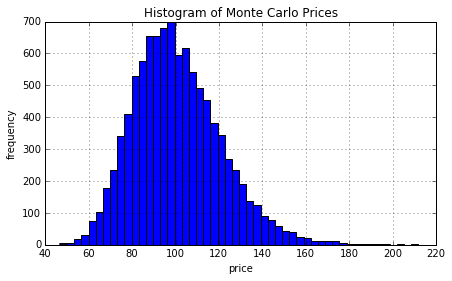

In [12]:
 #needed for plot to appear in Jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

N = 10000
prices = bsm(100, 0.03, 0.4, 3.0/12, np.random.standard_normal(N))

plt.figure(figsize=(7,4))
plt.hist(prices, label=['prices'], bins=50)
plt.grid(True)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of Monte Carlo Prices')

## making your plot interactive



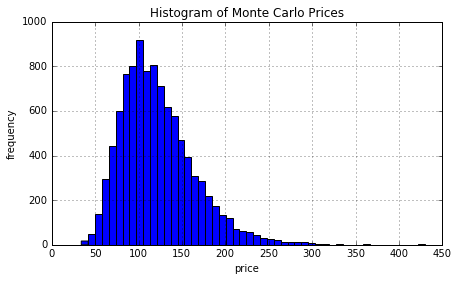

In [24]:
from ipywidgets import interact
def plot_histogram(r, sigma, t):
    s = 100
    n = 10000
    prices = bsm(s, r, sigma, t, np.random.standard_normal(n))
    plt.figure(figsize=(7,4))
    plt.hist(prices, label=['prices'], bins=50)
    plt.grid(True)
    plt.xlabel('price')
    plt.ylabel('frequency')
    plt.title('Histogram of Monte Carlo Prices')
interact(plot_histogram,  r=(0.0, 0.2, 0.01), sigma=(0.01, 1.0, 0.01), t=(0.01, 2, 0.01));

## estimating option price

The point of generating a distribution of stocks prices was to generate a distribution of the option value at maturity. The present value of the average option value at maturity is an estimate of wha the option is worth today. 

In [ ]:
K = 105 #Strike price
N = 1000000
r = 0.03
t = 3.0/12
prices = bsmv(100, r, 0.4, t, numpy.random.standard_normal(N))
# print np.maximum(0, prices - K)
print sum(np.maximum(0, prices - K))/N * math.exp(-r*t)

## closed-form BSM

How does this compare with the closed-from [Black-Merton-Scholes](https://en.wikipedia.org/wiki/Black–Scholes_model) model? 

$\begin{align}
  C(S, t) &= \Phi(d_1)S - \Phi(d_2) Ke^{-rT)} \\
     d_1 &= \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T\right] \\
     d_2 &= d_1 - \sigma\sqrt{T} \\
\end{align}$

where $\Phi$ is the standard normal cumulative distribution function.

In [ ]:
from scipy.stats import norm
def call(s, r, sigma, t, k):
    d1 = (math.log(float(s)/k)+(r + sigma**2/2)*t)/(sigma * math.sqrt(t))
    d2 = d1 - sigma * math.sqrt(T)
    return norm.cdf(d1) * s - norm.cdf(d2) * k * math.exp(-r * t)

print call(100, 0.03, 0.4, 3.0/12, 105)